In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset

lccs = pd.read_csv('loan.csv')
lccs.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Removing Columns with null values

In [3]:
##Identify columns with all NA values >= 60%
loan_df = pd.read_csv('loan.csv')
print('Initial Shape :',loan_df.shape)
df_cols = pd.DataFrame(loan_df.isna().mean()*100)

df_cols_with_na = df_cols[df_cols[0] >= 60]
df_cols_with_na.index.name = 'col_name'
df_cols_with_na.reset_index(inplace=True)
na_list = df_cols_with_na['col_name'].tolist()

## dropping those columns with 60% missing data
loan_df.drop(na_list, axis =1, inplace = True)
print('Shape Post Dropping Columns:',loan_df.shape)
loan_df.columns

Initial Shape : (39717, 111)
Shape Post Dropping Columns: (39717, 54)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [4]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

# Filtering the data
Selecting the loans_status other than 'current', as we cannot derive insights from these running loans.
So considering only 'Charged-off' and 'Fully-paid' loans in the dataset.

In [5]:
loan_df = loan_df[loan_df['loan_status'] != 'Current']
print('Shape of the dataframe with Charged-off and Fully-paid loans: ',loan_df.shape)

Shape of the dataframe with Charged-off and Fully-paid loans:  (38577, 54)


## Checking for Columns containing Single Value. And dropping them from the dataset as they are irrelevant for ananlysis

In [6]:
loan_df.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25803
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

In [7]:
#shape before dropping
print('shape of dataframe before dropping : ',loan_df.shape)
# Identifying & dropping the columns containing 0/nan
print('unique values in collections_12_mths_ex_med:', loan_df['collections_12_mths_ex_med'].unique())
print('unique values in acc_now_delinq:', loan_df['acc_now_delinq'].unique())
print('unique values in chargeoff_within_12_mths:', loan_df['chargeoff_within_12_mths'].unique())
print('unique values in delinq_amnt:', loan_df['delinq_amnt'].unique())
print('unique values in pymnt_plan:', loan_df['pymnt_plan'].unique())
print('unique values in tax_liens:', loan_df['tax_liens'].unique())
print('unique values in out_prncp:', loan_df['out_prncp'].unique())
print('unique values in out_prncp_inv:', loan_df['out_prncp_inv'].unique())


loan_df.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pymnt_plan' , 
              'tax_liens','out_prncp','out_prncp_inv'], axis=1,inplace = True)

print('shape of dataframe post dropping 0/nan valued columns :',loan_df.shape)

shape of dataframe before dropping :  (38577, 54)
unique values in collections_12_mths_ex_med: [ 0. nan]
unique values in acc_now_delinq: [0]
unique values in chargeoff_within_12_mths: [ 0. nan]
unique values in delinq_amnt: [0]
unique values in pymnt_plan: ['n']
unique values in tax_liens: [ 0. nan]
unique values in out_prncp: [0.]
unique values in out_prncp_inv: [0.]
shape of dataframe post dropping 0/nan valued columns : (38577, 46)


In [8]:
# Dropping the columns containing only single value, These are not adding any value to analysis
print('shape of dataframe before dropping single valued columns : ',loan_df.shape)
print('unique values in application_type:', loan_df['application_type'].unique())
print('unique values in policy_code:', loan_df['policy_code'].unique())
print('unique values in initial_list_status:', loan_df['initial_list_status'].unique())

loan_df.drop(['initial_list_status','application_type','policy_code'], axis=1, inplace = True)
print('shape of dataframe post dropping single valued columns :',loan_df.shape)

shape of dataframe before dropping single valued columns :  (38577, 46)
unique values in application_type: ['INDIVIDUAL']
unique values in policy_code: [1]
unique values in initial_list_status: ['f']
shape of dataframe post dropping single valued columns : (38577, 43)


In [9]:
# dropping the columns which cannot be included in analysis, as they have very wide-spread subjective data
print('shape of dataframe before dropping wide spread columns :',loan_df.shape)

loan_df.drop(['url','desc','id'], axis=1, inplace = True)

print('shape of dataframe post dropping wide spread columns :',loan_df.shape)

shape of dataframe before dropping wide spread columns : (38577, 43)
shape of dataframe post dropping wide spread columns : (38577, 40)


# Checking NA or missing values in the subset across columns

In [10]:
loan_df.isna().sum()/len(loan_df) *100

member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0

treating missing values

In [11]:
print('Mode of employment length:', loan_df['emp_length'].mode()[0])
loan_df.emp_length.value_counts()

Mode of employment length: 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [12]:
emp_len_mode = loan_df['emp_length'].mode()[0]
loan_df['emp_length'].fillna(emp_len_mode , inplace = True)
loan_df['emp_length'].isna().sum()

0

In [13]:
print('Mode of revolving utility:', loan_df['revol_util'].mode()[0])
loan_df.revol_util.value_counts()

Mode of revolving utility: 0%


0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
12.42%      1
26.33%      1
8.58%       1
38.77%      1
21.59%      1
Name: revol_util, Length: 1088, dtype: int64

In [14]:
revol_util_mode = loan_df['revol_util'].mode()[0]
loan_df['revol_util'].fillna(revol_util_mode , inplace = True)
loan_df['revol_util'].isna().sum()

0

In [15]:
print('Mode of public record bankruptcies:', loan_df['pub_rec_bankruptcies'].mode())
loan_df.pub_rec_bankruptcies.value_counts()

Mode of public record bankruptcies: 0    0.0
dtype: float64


0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [16]:
pub_rec_bankruptcies_mode = loan_df['pub_rec_bankruptcies'].mode()[0]
loan_df['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode , inplace = True)
loan_df['pub_rec_bankruptcies'].isna().sum()

0

In [17]:
# categorising major columns into categorical, numerical variables and loan attribute columns
cat_cols = ['term','grade','sub_grade','home_ownership','verification_status','loan_status', 'purpose','zip_code',
           'addr_state']

num_cols = ['emp_length','annual_inc','delinq_2yrs','inq_last_6mths','total_rec_prncp','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee','earliest_cr_line']

loan_att_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','open_acc','pub_rec',
                 'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                 'total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','pub_rec_bankruptcies']


# standardizing data

Extracting numeric part from alpha numeric data for easy understanding.

Treating special characters from data eg:%, <.

Creating flag based columns for some of the categorical columns of String type.

Deriving log scale columns for widely dispersed continuous data.

Deriving Year column from 'early_credit_line' data.

In [18]:
# data manipulation. considering the numeric part of the data for convenience
loan_df['term'].replace(' 36 months', 36, inplace =True)
loan_df['term'].replace(' 60 months', 60, inplace =True)

In [19]:
# converting the 'emp_length' column to int from string.
loan_df['emp_length'].replace('< 1 year', '0 years', inplace = True)
loan_df['emp_length'].replace('10+ years', '10 years', inplace = True)
print(loan_df['emp_length'].unique())
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x if pd.isnull(x) else float(x.split(' ')[0]))
print(loan_df['emp_length'].unique())

['10 years' '0 years' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years']
[10.  0.  3.  8.  9.  4.  5.  1.  6.  2.  7.]


In [20]:
# since 'int_rate' is a string datatype, converting it into float
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x.strip('%')))

In [21]:
# since 'revol_util' is a string datatype, converting it into float
loan_df.revol_util = loan_df.revol_util.apply(lambda x: float(x.strip('%')))

In [22]:
# creating a numeric value field for loan_status; 0 for Charged Off and 1 for Fully Paid
loan_df['loan_status_flag'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

In [23]:
#converting 'annual_inc' to 'log_annual_inc', i.e. log of annual income inorder to fit it into box-plot and check outliers
loan_df['log_annual_inc'] = loan_df['annual_inc'].apply(lambda x: np.log10(x))

In [24]:
# log transformation of revol_bal data as they are widely spread, which can be seen from above table's 25%ile and 75%ile 
loan_df['log_revol_bal'] = loan_df['revol_bal'].apply(lambda x: np.log10(x))

In [25]:
# earliest_cr_line
# converting the 'earliset_cr_line' to only 'Year' for looking into the history of Credit line Issued
import datetime

def pickDate(earliest_cr_line):
    dt = int(datetime.datetime.strptime(earliest_cr_line, '%b-%y').strftime('%Y'))
    
    if (dt >= 2030):
        dt-=100
    return dt 
loan_df['earliest_cr_line_yr'] = loan_df.earliest_cr_line.apply(pickDate)
print(loan_df.earliest_cr_line_yr)

0        1985
1        1999
2        2001
3        1996
5        2004
         ... 
39712    1990
39713    1986
39714    1998
39715    1988
39716    2003
Name: earliest_cr_line_yr, Length: 38577, dtype: int64


# Handling outliers

In [26]:
def outlier_treat(df , trea_col, perc):
    upper_data = df[trea_col].quantile(perc)
    return df[df[trea_col] <= upper_data]

In [27]:
#annual_incm
loan_df = outlier_treat(loan_df,'annual_inc',0.95)
loan_df.annual_inc.describe()


count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64


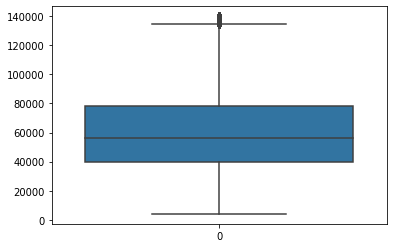

In [28]:
print(loan_df.annual_inc.describe())
sns.boxplot(loan_df['annual_inc'])

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


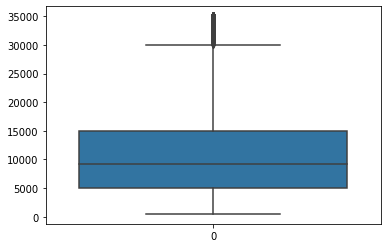

In [29]:
print(loan_df.loan_amnt.describe())
sns.boxplot(loan_df['loan_amnt'])

count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt, dtype: float64


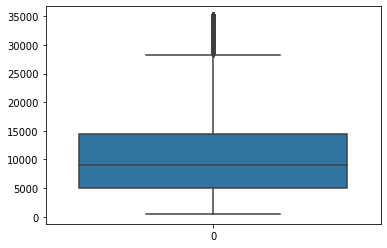

In [30]:
print(loan_df.funded_amnt.describe())
sns.boxplot(loan_df['funded_amnt'])

count    36654.000000
mean      9894.181349
std       6730.756232
min          0.000000
25%       4975.000000
50%       8375.000000
75%      13623.731415
max      35000.000000
Name: funded_amnt_inv, dtype: float64


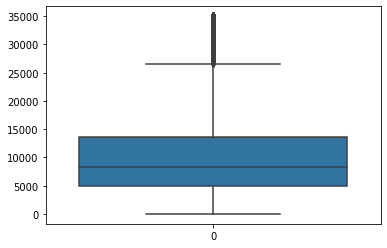

In [31]:
print(loan_df.funded_amnt_inv.describe())
sns.boxplot(loan_df['funded_amnt_inv'])

count    36654.000000
mean        48.596019
std         28.319039
min          0.000000
25%         25.200000
50%         48.900000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64


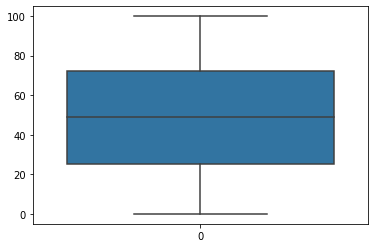

In [32]:
print(loan_df.revol_util.describe())
sns.boxplot(loan_df['revol_util'])

count     36654.000000
mean      12312.872265
std       13768.342283
min           0.000000
25%        3554.000000
50%        8498.000000
75%       16156.750000
max      149000.000000
Name: revol_bal, dtype: float64
0.90    26949.00
0.95    36774.75
0.99    69854.96
Name: revol_bal, dtype: float64


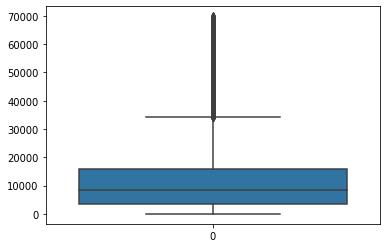

In [33]:
print(loan_df.revol_bal.describe())
print(loan_df.revol_bal.quantile([0.90,0.95,0.99]))
loan_df = outlier_treat(loan_df,'revol_bal',0.99)
sns.boxplot(loan_df['revol_bal'])

count    36287.000000
mean       310.798733
std        198.383882
min         15.690000
25%        162.870000
50%        269.520000
75%        407.170000
max       1305.190000
Name: installment, dtype: float64
0.90    586.34
0.95    702.26
0.99    896.22
Name: installment, dtype: float64


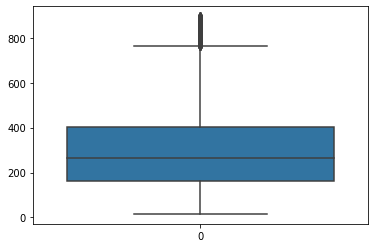

In [34]:
print(loan_df.installment.describe())
print(loan_df.installment.quantile([0.90,0.95,0.99]))
loan_df = outlier_treat(loan_df,'installment',0.99)
sns.boxplot(loan_df['installment'])

count    35927.000000
mean     11163.137528
std       8014.416710
min          0.000000
25%       5357.495671
50%       9246.920000
75%      15141.105665
max      53612.089680
Name: total_pymnt, dtype: float64
0.90    22393.366604
0.95    27436.369986
0.99    36621.344295
Name: total_pymnt, dtype: float64


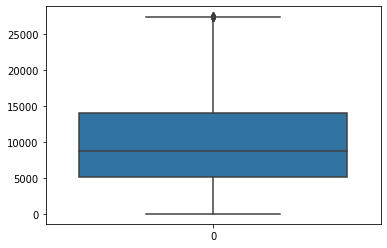

In [35]:
print(loan_df.total_pymnt.describe())
print(loan_df.total_pymnt.quantile([0.90,0.95,0.99]))
loan_df = outlier_treat(loan_df,'total_pymnt',0.95)
sns.boxplot(loan_df['total_pymnt'])

count    34130.000000
mean      1672.482613
std       1565.879000
min          0.000000
25%        595.865000
50%       1167.305000
75%       2236.480000
max      13482.630000
Name: total_rec_int, dtype: float64
0.90    3765.3750
0.95    4911.2330
0.99    7423.1728
Name: total_rec_int, dtype: float64


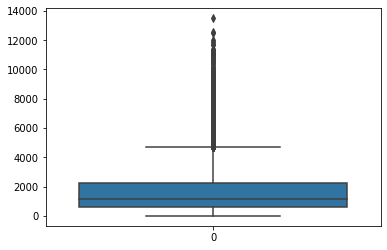

In [36]:
print(loan_df.total_rec_int.describe())
print(loan_df.total_rec_int.quantile([0.90,0.95,0.99]))
sns.boxplot(loan_df['total_rec_int'])

count    34130.000000
mean        13.345756
std          6.683005
min          0.000000
25%          8.190000
50%         13.450000
75%         18.650000
max         29.990000
Name: dti, dtype: float64
0.90    22.3600
0.95    23.8455
0.99    26.6171
Name: dti, dtype: float64


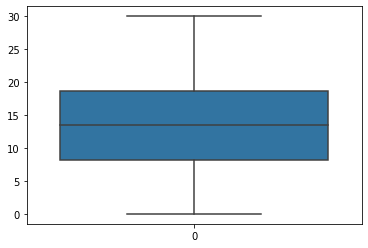

In [37]:
print(loan_df.dti.describe())
print(loan_df.dti.quantile([0.90,0.95,0.99]))
sns.boxplot(loan_df['dti'])

## Univariate Analysis

In [38]:
# distribution of 'term' of the loan
loan_df.groupby('term').size()/len(loan_df) * 100

term
36    77.978318
60    22.021682
dtype: float64

In [39]:
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_status_flag,log_annual_inc,log_revol_bal,earliest_cr_line_yr
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,...,0.00,0.00,Jan-15,171.62,May-16,0.0,1,4.380211,4.135069,1985
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,4.477121,3.227115,1999
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,...,0.00,0.00,Jun-14,649.91,May-16,0.0,1,4.088207,3.470704,2001
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,4.691965,3.748033,1996
5,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,...,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,4.556303,3.901077,2004


In [40]:
# distribution of 'loan_status' of the loan
loan_df.loan_status.value_counts(normalize = True)*100

Fully Paid     84.685028
Charged Off    15.314972
Name: loan_status, dtype: float64

1    88.569926
0    11.430074
Name: loan_status_flag, dtype: float64


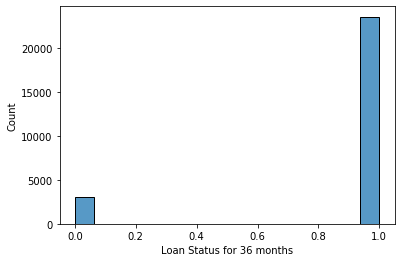

In [41]:
#The loan tenure of charged off vs fully repoaid in 36 months
loan_df_36 = loan_df[loan_df.term == 36]
sns.histplot(loan_df_36.loan_status_flag)
plt.xlabel('Loan Status for 36 months')
print(loan_df_36.loan_status_flag.value_counts(normalize = True)*100)

1    70.928685
0    29.071315
Name: loan_status_flag, dtype: float64


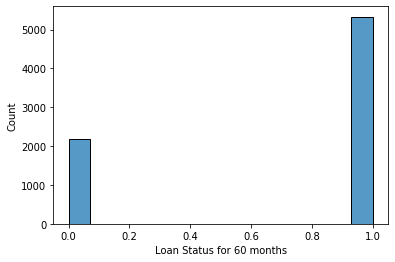

In [42]:
#The loan tenure of charged off vs fully repoaid in 60 months
loan_df_60 = loan_df[loan_df.term == 60]
sns.histplot(loan_df_60.loan_status_flag)
plt.xlabel('Loan Status for 60 months')
print(loan_df_60.loan_status_flag.value_counts(normalize = True)*100)

60 months Term of the loan shows higher Charged off percentage

In [43]:
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        50.553765
MORTGAGE    41.274539
OWN          7.899209
OTHER        0.263698
NONE         0.008790
Name: home_ownership, dtype: float64

In [44]:
# replacing 'NONE' with 'OTHER'
loan_df.home_ownership.replace('NONE','OTHER', inplace =True)
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        50.553765
MORTGAGE    41.274539
OWN          7.899209
OTHER        0.272488
Name: home_ownership, dtype: float64

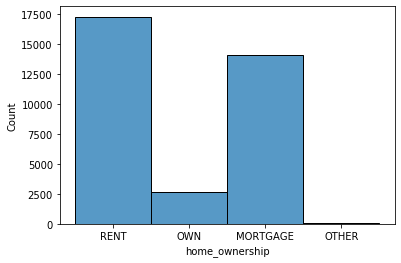

In [45]:
sns.histplot(loan_df.home_ownership)

### Defining a Function for Analyzing the Columns with 'Charged Off', 'Fully Paid' and 'Both Charged Off and 'Fully Paid'

In [46]:
def plot_hist(df_nm,col_nm,status_flag):
    df_nm.sort_values(col_nm, ascending = False, inplace = True)
    if status_flag != 3:
        df_nm = df_nm[df_nm.loan_status_flag == status_flag]
        
    
    if col_nm in ['purpose','sub_grade']: 
        plt.figure(figsize = (25,5))
    else:       
        plt.figure(figsize = (8,4))
    
    plt.ylabel('Frequency')
    
    sns.histplot(df_nm[col_nm])
    if(status_flag == 1 ):
        
        plt.xlabel(col_nm +' fully paid')
    elif (status_flag == 0 ) :
        plt.xlabel(col_nm +' charged off') 
    elif (status_flag == 3):
        plt.xlabel(col_nm)

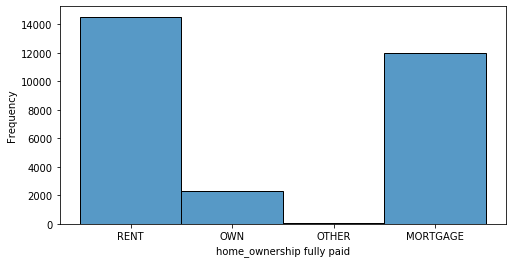

In [47]:
# fully paid
plot_hist(loan_df,'home_ownership',1)   

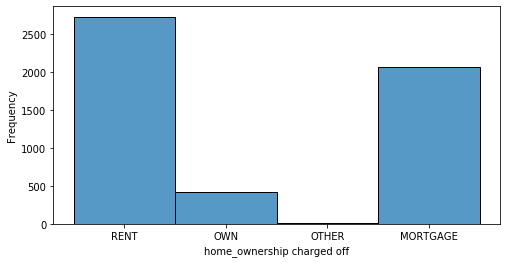

In [48]:
plot_hist(loan_df,'home_ownership',0) 

#Percentage Distribution provided below

Rental & Mortgage have higher probability of charge off than rest categories

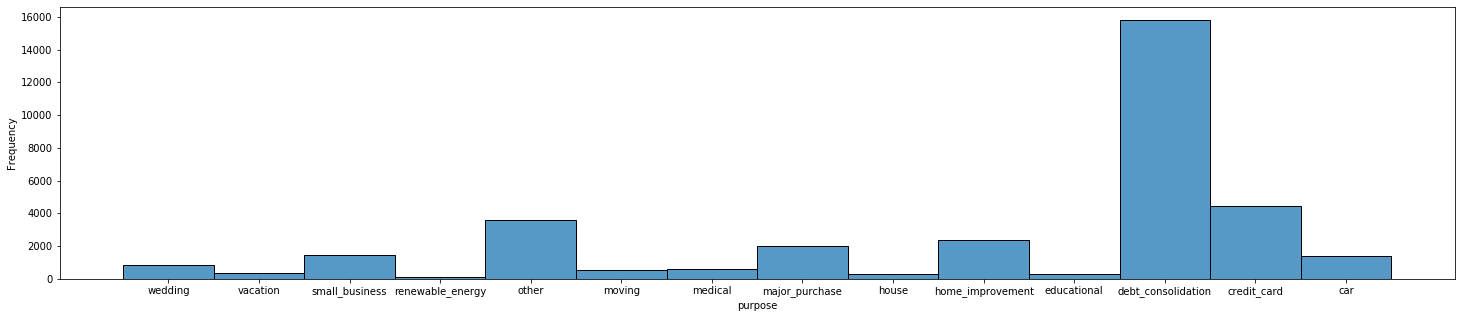

In [49]:
#loan_df.purpose.value_counts(normalize = True)*100
plot_hist(loan_df,'purpose',3)

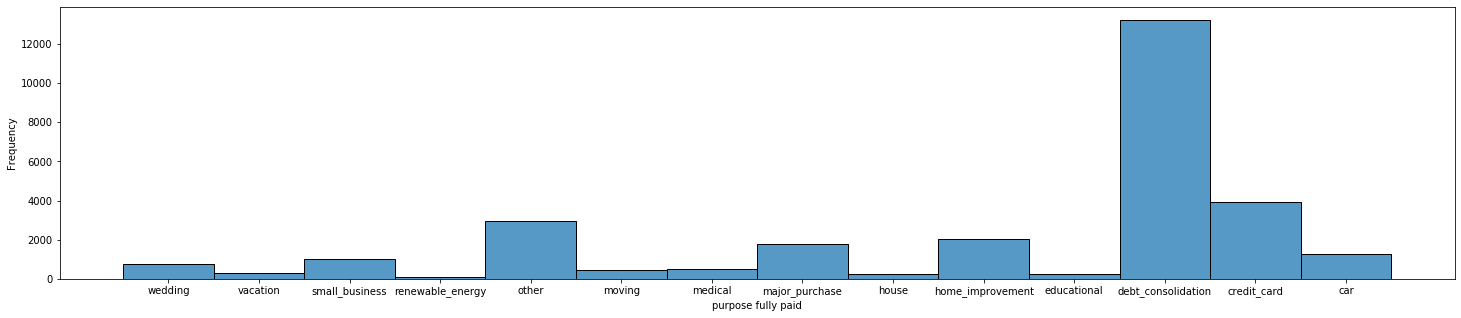

In [50]:
plot_hist(loan_df,'purpose',1) 

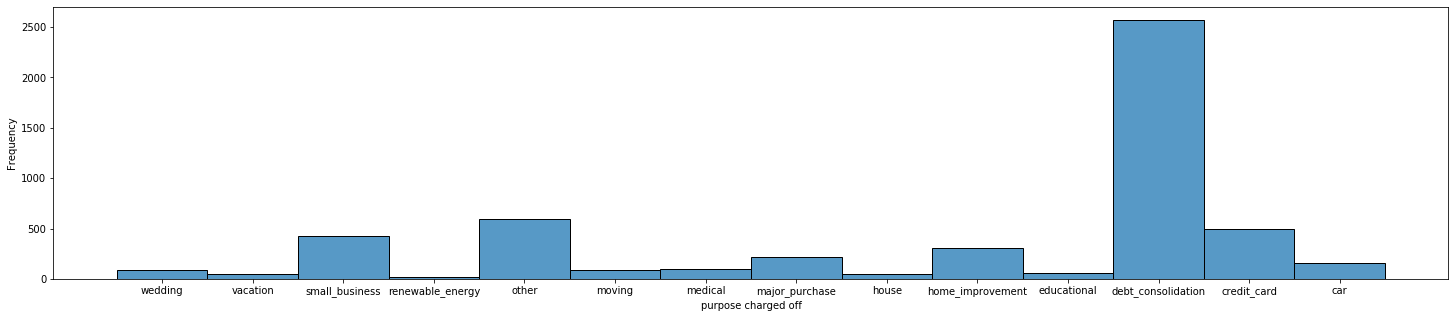

In [51]:
plot_hist(loan_df,'purpose',0) 


It is observed that around 49% of the charge off has happened due to debt_consolidation

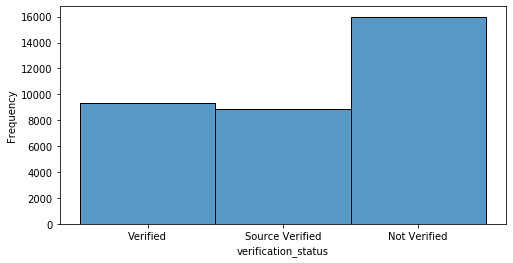

In [52]:
plot_hist(loan_df,'verification_status',3)

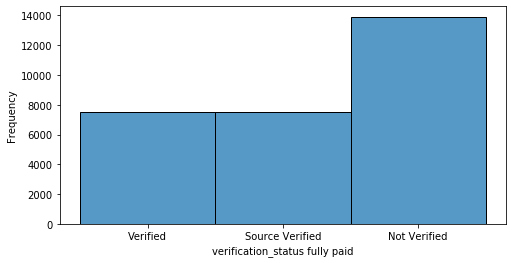

In [53]:
plot_hist(loan_df,'verification_status',1)

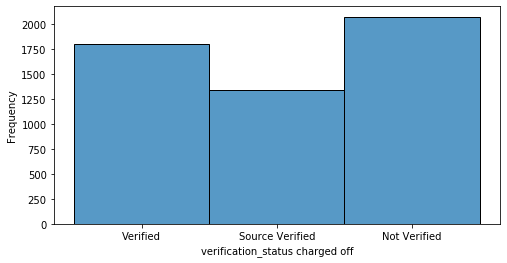

In [54]:
plot_hist(loan_df,'verification_status',0)

No appropriate conclusion

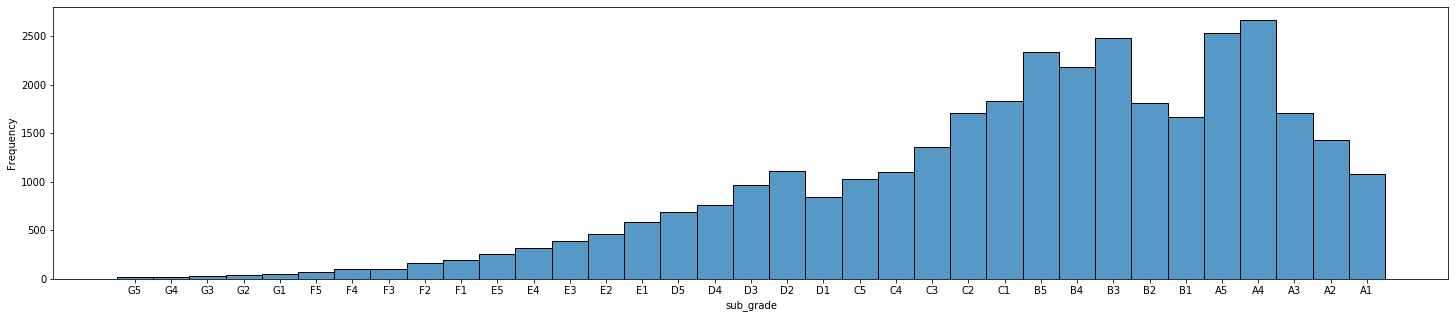

In [55]:
# subgrade
plot_hist(loan_df,'sub_grade',3)

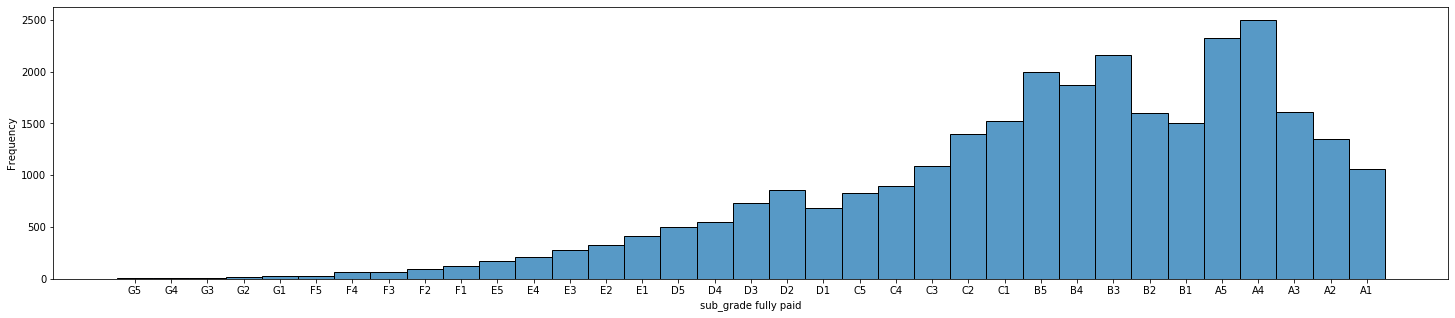

In [56]:
plot_hist(loan_df,'sub_grade',1)

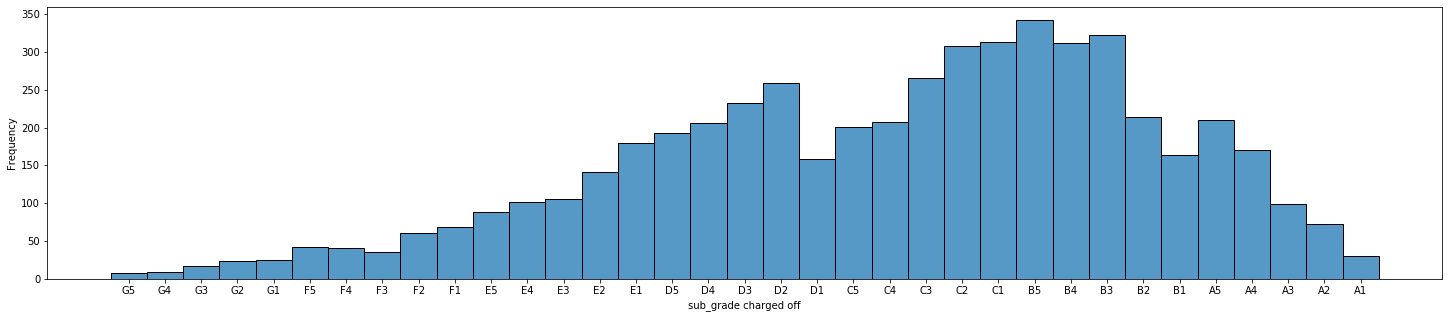

In [57]:
plot_hist(loan_df,'sub_grade',0)

Observation on 'Grade' categories: Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population, but it is alos observed that number of loans in lower sub-grades are more than its higher sub-grades, except for Grade C, where it is a opposite trend.

In [58]:
#Employement Length
loan_df.emp_length.unique()

array([10.,  5.,  2.,  0.,  4.,  3.,  1.,  6.,  7.,  9.,  8.])

count    34130.000000
mean         4.955318
std          3.583215
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


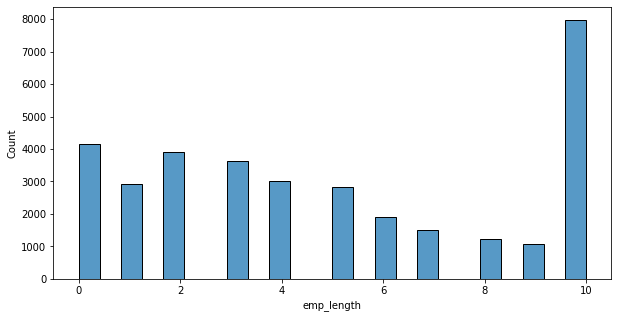

In [59]:
print(loan_df['emp_length'].describe())
plt.figure(figsize = (10,5))
sns.histplot(loan_df.emp_length)

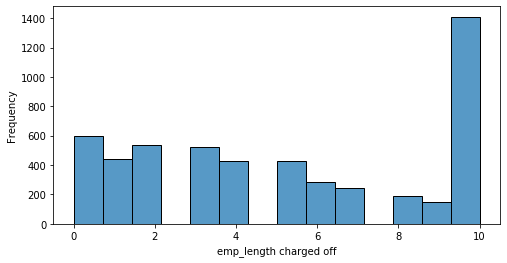

In [60]:
plot_hist(loan_df,'emp_length',0)

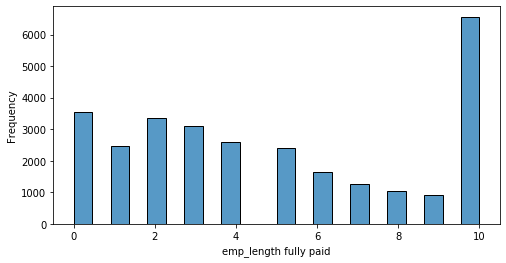

In [61]:
plot_hist(loan_df,'emp_length',1)

Observation: Employment length is not providing any insights here, as borrowers with 10+ years of employment are more in both the population 'Fully Paid' and 'Charged-off'

# annual income

In [62]:
loan_df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,55176.622518,25756.440032,4080.0,36000.0,50004.0,70000.0,140004.0
Fully Paid,28903.0,59433.472416,26873.633561,4000.0,39996.0,55000.0,75000.0,140004.0


In [63]:
loan_df['annual_inc'].describe()

count     34130.000000
mean      58781.537039
std       26749.164946
min        4000.000000
25%       39000.000000
50%       54300.000000
75%       75000.000000
max      140004.000000
Name: annual_inc, dtype: float64

In [64]:
# categorizing the 'annual income' to lower, lowest, medium, higher, highest
def annual_inc_cat(x):
    x = int(x)
    if x < 15000:
        return '0-15000'
    elif x>=15000 and x<39000:
        return '15000-39000'
    elif x>=39000 and x<54300:
        return '39000-54300'
    elif x>=54300 and x<75000:
        return '54300-75000'
    else:
        return 'more than 75,000'
    


In [65]:
loan_df['annual_inc_cat'] = loan_df['annual_inc'].apply(lambda x : annual_inc_cat(x))
loan_df[['annual_inc','annual_inc_cat']].head()

,annual_inc,annual_inc_cat
24549,110000.0,"more than 75,000"
33750,28000.0,15000-39000
27738,19896.0,15000-39000
21675,98000.0,"more than 75,000"
26826,50000.0,39000-54300


In [66]:
df_ls_inc1 = loan_df.groupby(['annual_inc_cat','loan_status']).agg(loan_amnt = ('loan_amnt','sum'))
df_ls_inc1.reset_index(inplace=True)
df_ls_inc2 = df_ls_inc1.groupby(['annual_inc_cat']).agg(tot_loan_amnt = ('loan_amnt','sum'))
df_ls_inc2.reset_index(inplace=True)

df_ls_inc_merged = pd.merge(df_ls_inc1,df_ls_inc2,on=['annual_inc_cat'],how='inner')
df_ls_inc_merged['loan_amnt_%'] = (df_ls_inc_merged['loan_amnt']/df_ls_inc_merged['tot_loan_amnt'])*100
df_ls_inc_merged.head(20)

,annual_inc_cat,loan_status,loan_amnt,tot_loan_amnt,loan_amnt_%
0,0-15000,Charged Off,338425,1361200,24.862254
1,0-15000,Fully Paid,1022775,1361200,75.137746
2,15000-39000,Charged Off,10758600,55146625,19.509081
3,15000-39000,Fully Paid,44388025,55146625,80.490919
4,39000-54300,Charged Off,14697725,78907900,18.626430
5,39000-54300,Fully Paid,64210175,78907900,81.373570
6,54300-75000,Charged Off,15757650,88255350,17.854612
7,54300-75000,Fully Paid,72497700,88255350,82.145388
8,"more than 75,000",Charged Off,17328075,104469100,16.586795
9,"more than 75,000",Fully Paid,87141025,104469100,83.413205


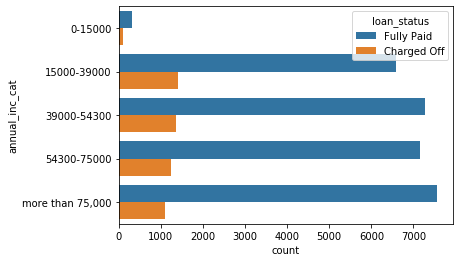

In [67]:
sns.countplot(data = loan_df,y = loan_df['annual_inc_cat'].sort_values(), hue = loan_df['loan_status'] )

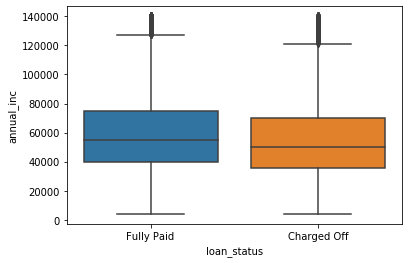

In [68]:
sns.boxplot(data = loan_df, x = loan_df['loan_status'] ,y = loan_df['annual_inc'])

In [69]:
loan_df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,4.692475,0.214861,3.61066,4.556303,4.699005,4.845098,5.14614
Fully Paid,28903.0,4.727168,0.209421,3.60206,4.602017,4.740363,4.875061,5.14614


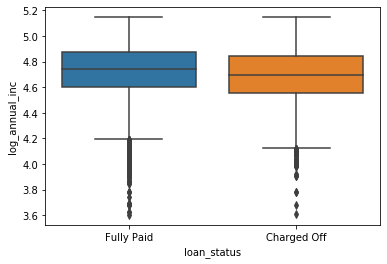

In [70]:
sns.boxplot(data = loan_df, x = loan_df['loan_status'] ,y = loan_df['log_annual_inc'])

Observation: Charged Off accounts have less spread of Income when compared to Fully Paid accounts, so it shows higher income accounts are less likely to Default.

# Interest rate

In [71]:
loan_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,13.658018,3.575602,5.42,11.14,13.49,16.07,24.40
Fully Paid,28903.0,11.321984,3.437661,5.42,8.00,11.14,13.61,23.91


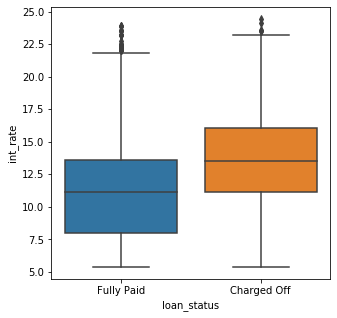

In [72]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['int_rate'] )

Observation: 'Charged Off' accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%

# installment

In [73]:
loan_df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,312.345653,190.412144,22.79,165.06,278.65,419.840,892.30
Fully Paid,28903.0,277.739216,158.183388,15.69,156.48,250.49,371.585,888.14


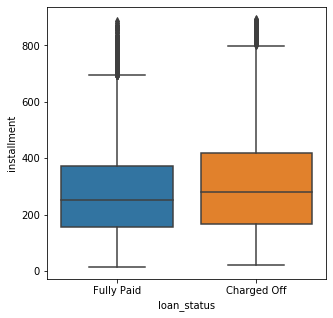

In [74]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['installment'] )

Observation: Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts

# dti

In [75]:
# dti
loan_df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,14.076164,6.602146,0.0,9.15,14.36,19.395,29.85
Fully Paid,28903.0,13.213665,6.689126,0.0,8.03,13.27,18.510,29.99


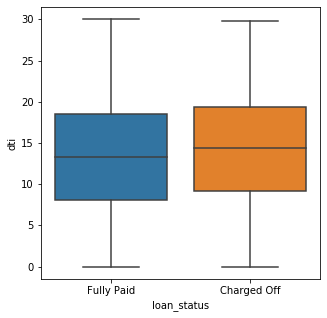

In [76]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['dti'] )

Observation: Charged Off loans have marginally higher dti when compared to Fully Paid loans. 

# earliest credit line

In [77]:
loan_df.groupby('loan_status')['earliest_cr_line_yr'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,1997.184427,6.722483,1962.0,1994.0,1998.0,2002.0,2008.0
Fully Paid,28903.0,1996.985399,6.729652,1946.0,1994.0,1998.0,2002.0,2008.0


In [78]:
# categorizing the 'earliest credit line'
def year_cat(x):
    if x < 1980:
        return 'pre_80s'
    elif x>=1980 and x<1990:
        return '80s'
    elif x>=1990 and x<2000:
        return '90s'
    else:
        return 'in_20s'
    
loan_df['earliest_cr_line_yr_cat'] = loan_df['earliest_cr_line_yr'].apply(lambda x : year_cat(x))
loan_df['earliest_cr_line_yr_cat'].head()

24549        90s
33750        90s
27738    pre_80s
21675        90s
26826        90s
Name: earliest_cr_line_yr_cat, dtype: object

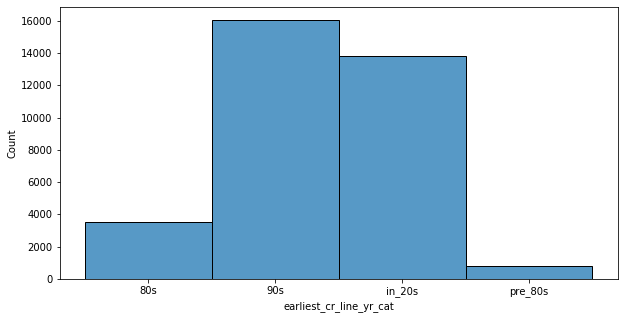

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(loan_df.earliest_cr_line_yr_cat.sort_values())

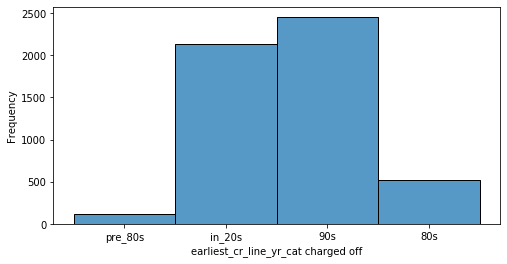

In [80]:
# Charged Off
plot_hist(loan_df,'earliest_cr_line_yr_cat',0)

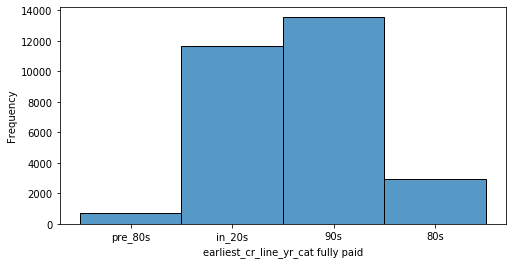

In [81]:
# Fully Paid
plot_hist(loan_df,'earliest_cr_line_yr_cat',1)

From above three graphs it is observed that there is an increase in numbers of new 'credit-lines' during the period 1993-2000. And it quite evindent that, Charged Off loans are also higher in numbers from this period.

# delinq_2yrs

In [82]:
loan_df.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,0.169696,0.534762,0.0,0.0,0.0,0.0,8.0
Fully Paid,28903.0,0.142200,0.487316,0.0,0.0,0.0,0.0,11.0


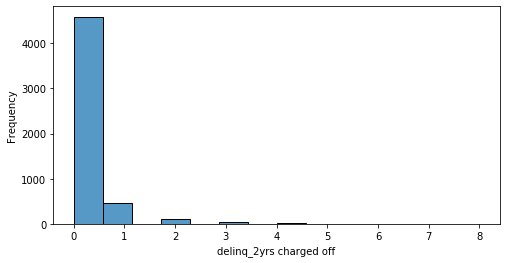

In [83]:
plot_hist(loan_df,'delinq_2yrs',0)

currently we cannot conclude anything, but delinquency may be used in further, while carrying out Bivariate analysis

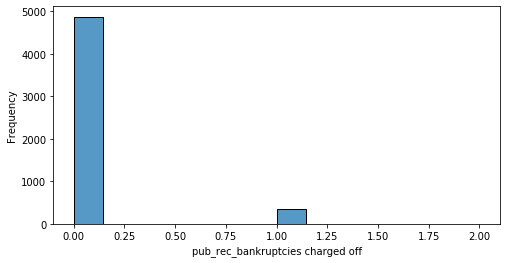

In [84]:
#Charged Off
plot_hist(loan_df, 'pub_rec_bankruptcies', 0)

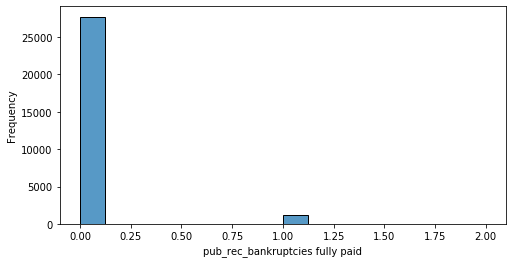

In [85]:
# Fully Paid
plot_hist(loan_df, 'pub_rec_bankruptcies', 1)

It is observed that Charged off loans are not necesarily reported in Public records as Bankrupt.

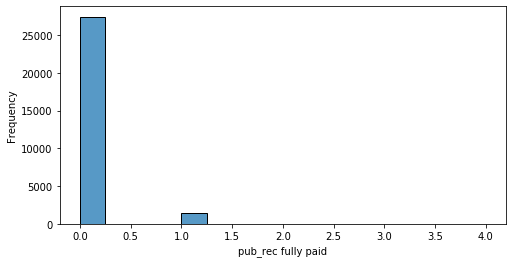

In [86]:
#Fully paid
plot_hist(loan_df, 'pub_rec', 1)

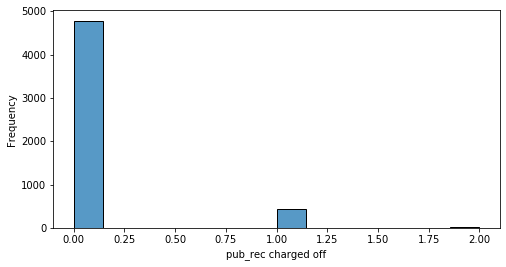

In [87]:
#Charged Off
plot_hist(loan_df, 'pub_rec', 0)

It is observed that Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans, which may be a driving factor for further analysis.

# revol_util

In [88]:
loan_df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,54.969212,27.985365,0.0,33.65,57.7,78.3,99.9
Fully Paid,28903.0,46.915090,28.229265,0.0,23.30,46.6,70.1,99.9


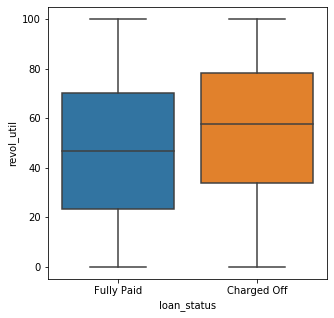

In [89]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['revol_util'] )

# revol_bal

In [90]:
loan_df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,11720.402143,11056.989255,0.0,3819.0,8682.0,16149.5,69715.0
Fully Paid,28903.0,10805.128291,10686.093411,0.0,3301.0,7866.0,14718.5,69823.0


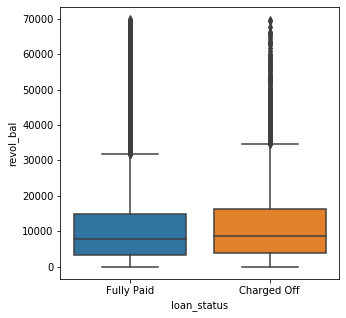

In [91]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['revol_bal'] )

It is observed that median of Revolving Credit Utility in Charged Off loans is marginally higher than Fully Paid

# total_acc

In [92]:
# total_acc
loan_df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,20.939353,11.265435,2.0,12.0,19.0,28.0,74.0
Fully Paid,28903.0,21.278864,11.114356,2.0,13.0,20.0,28.0,90.0


It is observed that 'Charged Off' accounts does not differ much from 'Fully Paid' accounts.

# addr_state

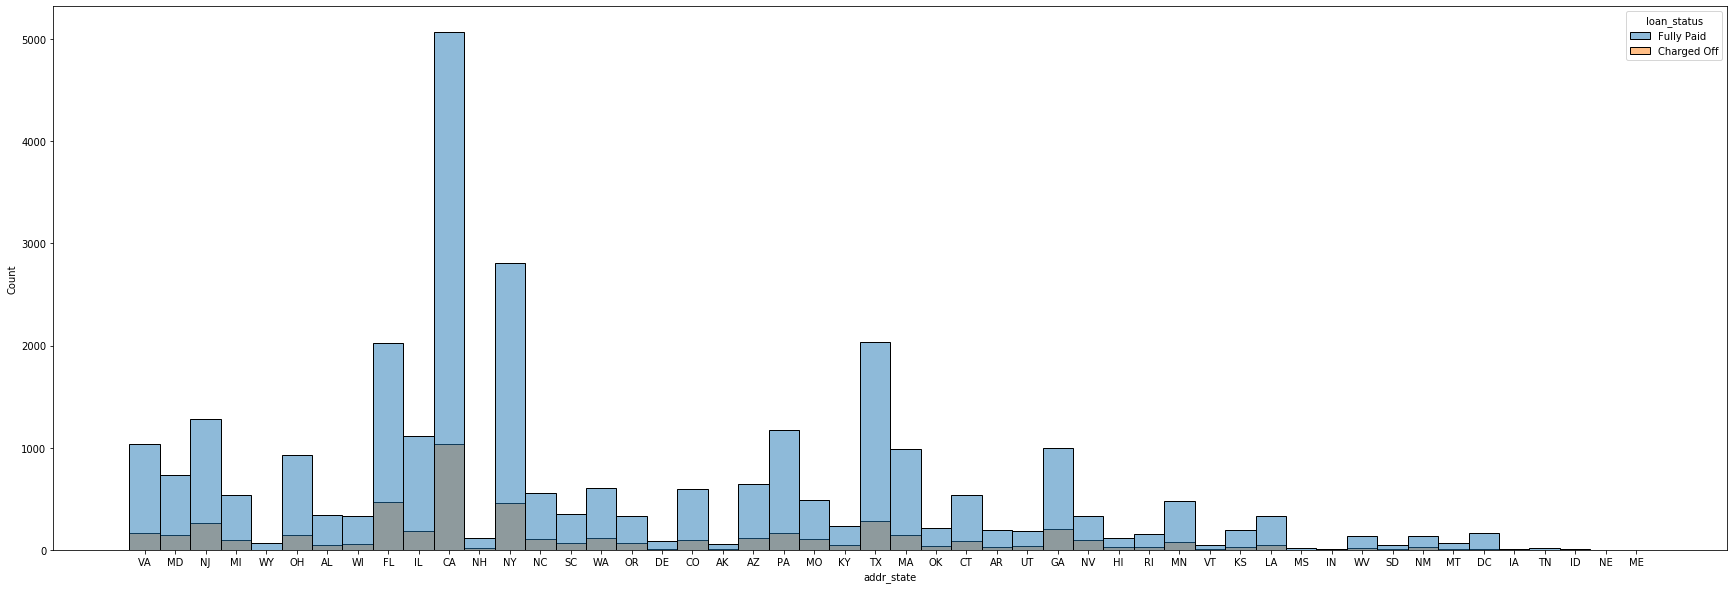

In [93]:
# addr_state
## for Charged-off account
plt.figure(figsize = (30,10))
sns.histplot(x = loan_df['addr_state'], data = loan_df['addr_state'].value_counts(normalize = True), hue = loan_df['loan_status'])

Using 'addr_state' column, both Fully paid and Charged Off loans are too higher for CL compared to other states. So any insights cannot be drawn from the 'addr_state' col

# funded_amnt_inv

In [94]:
#funded_amnt_inv
loan_df.groupby('loan_status')['funded_amnt_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,10087.740862,6787.196517,0.0,4925.0,8700.0,14500.956265,35000.0
Fully Paid,28903.0,8643.507925,5095.914548,0.0,4800.0,7950.0,12000.000000,25975.0


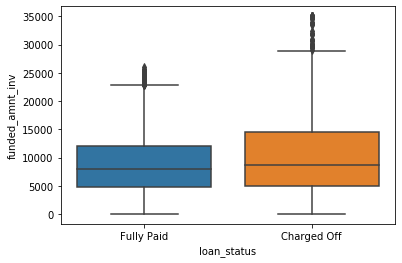

In [95]:
#funded_amnt_inv
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt_inv'])

# funded_amnt

In [96]:
#funded_amnt
loan_df.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,10937.105414,6924.385106,900.0,5025.0,10000.0,15000.0,35000.0
Fully Paid,28903.0,9095.976196,5124.136377,500.0,5000.0,8000.0,12000.0,26000.0


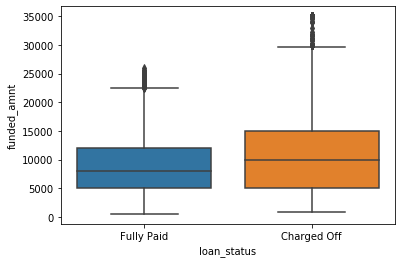

In [97]:
#funded_amnt
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt'])

Charged off loans have higher Funding values than Fully paid loans

# loan_amnt

In [98]:
#loan_amnt
loan_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5227.0,11264.678592,7287.104229,900.0,5187.5,10000.0,15250.0,35000.0
Fully Paid,28903.0,9315.977580,5408.603386,500.0,5000.0,8000.0,12300.0,35000.0


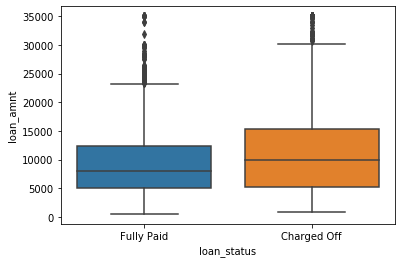

In [99]:
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['loan_amnt'])

loan amount to Charged off loans are higher in comparison to Fully Paid

## Consolidated Observations from Univariate Analysis

1.Charged off loans have higher repayment period.

2.Rental & Mortgage have higher probability of Charged off than rest categories.

3.It is observed that around 49% of the charge off has happened due to debt_consolidation

4.Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population, but it is also observed that number of loans in lower sub-grades are more than its higher sub-grades, except for Grade C, where it is an opposite trend.

5.Charged Off accounts have less spread of Income when compared to Fully Paid accounts, so it shows higher income accounts are less likely to Default.

6.Charged Off accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%.

7.Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts

8.Charged Off loans have marginally higher dti when compared to Fully Paid loans.

9.It is observed that Charged off loans are not necesarily reported in Public records as Bankrupt.

10.Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans.

11.Median of Revolving Credit Utility in Charged Off loans is marginally higher than Fully Paid.

12.Charged off loans have higher Funding values than Fully paid loans.

13.Loan amount to Charged off loans are higher in comparison to Fully Paid.

# Bivariate Analysis

### Plotting heat map to get correlation factor between Borrower financial attribute and Loan Attributes

In [100]:
loan_df.dtypes

member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc           

In [101]:
emp_length_cols = ['loan_amnt','term','int_rate','grade','home_ownership',
                   'annual_inc_cat', 'verification_status','dti', 'earliest_cr_line_yr_cat']

annual_inc_cols = ['loan_amnt','term','int_rate','grade','home_ownership','verification_status', 
                   'dti','earliest_cr_line_yr_cat']

dti_cols = ['loan_amnt','term','int_rate','grade','home_ownership','verification_status','earliest_cr_line_yr_cat']
           
loan_amnt_cols = ['int_rate', 'grade', 'home_ownership', 'verification_status', 'earliest_cr_line_yr_cat']

### comparision with employment length:
['loan_amnt','term','int_rate','grade','home_ownership','annual_inc_cat', 'verification_status','dti', 'earliest_cr_line_yr_cat']

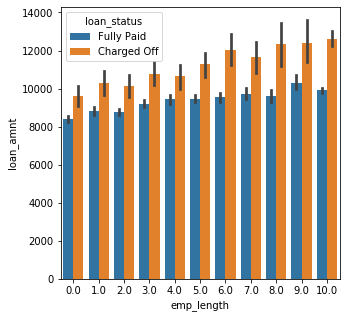

In [102]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

Higher Loan amount (approximately more than 10000) may lead to Charged Off, irrespective of Employment length

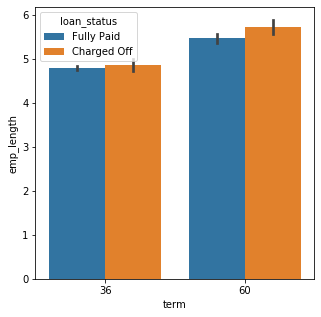

In [103]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['term'], y= loan_df['emp_length'], hue = loan_df['loan_status'])
plt.show()

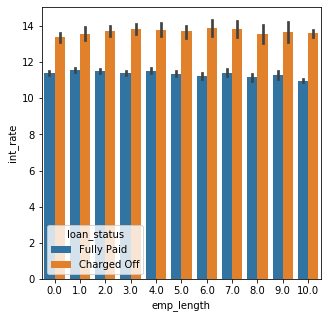

In [104]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()

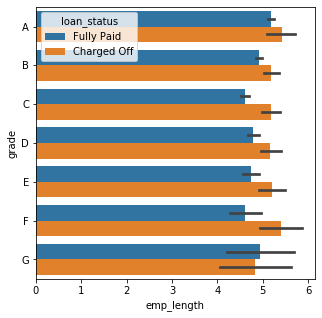

In [105]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['grade'].sort_values(), hue = loan_df['loan_status'])
plt.show()

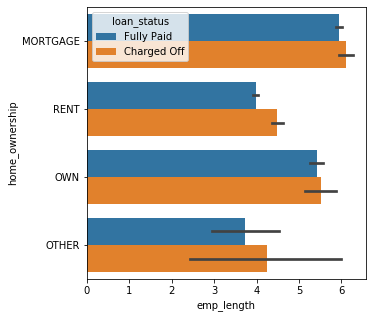

In [106]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['home_ownership'], hue = loan_df['loan_status'])
plt.show()

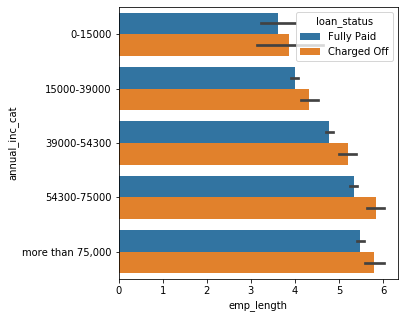

In [107]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['annual_inc_cat'].sort_values(), hue = loan_df['loan_status'])
plt.show()

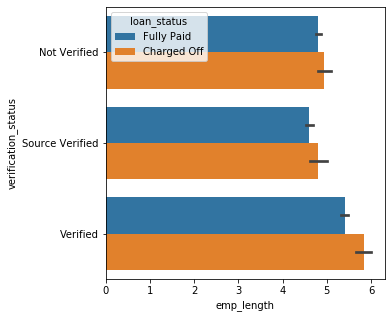

In [108]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['verification_status'], hue = loan_df['loan_status'])
plt.show()

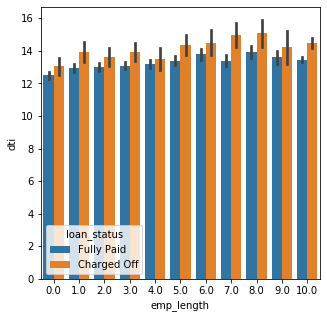

In [109]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['dti'], hue = loan_df['loan_status'])
plt.show()

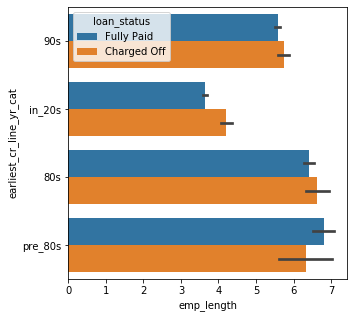

In [110]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['earliest_cr_line_yr_cat'], hue = loan_df['loan_status'])
plt.show()

#### Annual Income comaprison with 
['loan_amnt','term','int_rate','grade','home_ownership','verification_status','dti','earliest_cr_line_yr_cat']

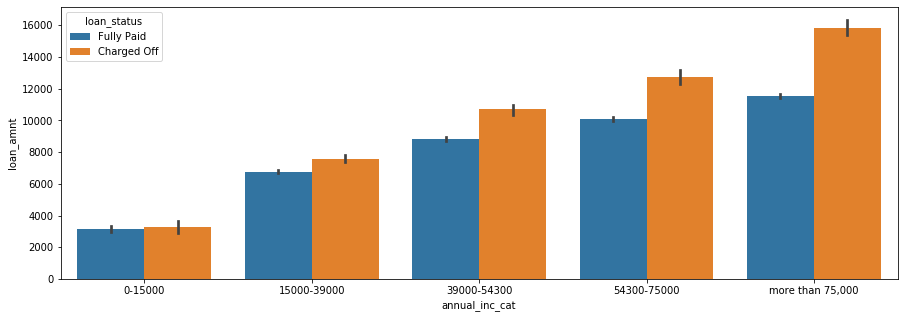

In [111]:
plt.figure(figsize = (15,5))
sns.barplot(x = loan_df['annual_inc_cat'].sort_values() , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

In [112]:
df_charged = df_ls_inc_merged[df_ls_inc_merged['loan_status']== 'Charged Off'][['annual_inc_cat','loan_amnt_%']]

df_charged

,annual_inc_cat,loan_amnt_%
0,0-15000,24.862254
2,15000-39000,19.509081
4,39000-54300,18.626430
6,54300-75000,17.854612
8,"more than 75,000",16.586795


Approving higher Loan amnount leads to more Charged-Off, this is also observed in Univariate analysis that higher Loan amount are more likely to default.

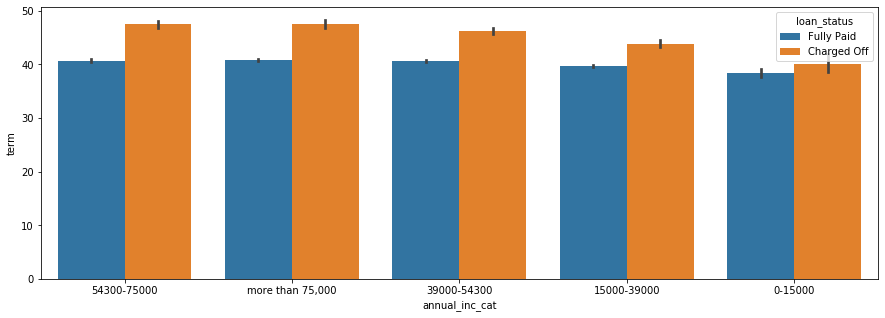

In [113]:
plt.figure(figsize = (15,5))
sns.barplot(x = loan_df['annual_inc_cat'] , y = loan_df['term'], hue = loan_df['loan_status'])
plt.show()

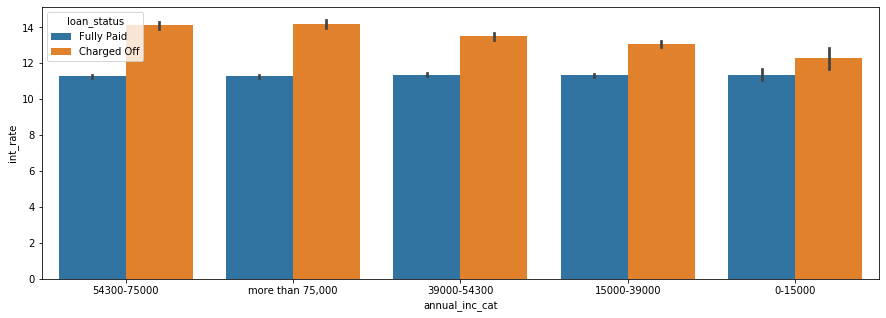

In [114]:
plt.figure(figsize = (15,5))
sns.barplot(x = loan_df['annual_inc_cat'] , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()

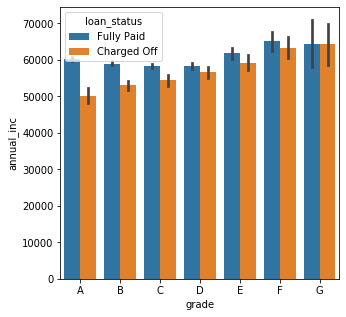

In [115]:
plt.figure(figsize = (5,5))
sns.barplot(y = loan_df['annual_inc'] , x = loan_df['grade'].sort_values(), hue = loan_df['loan_status'])
plt.show()

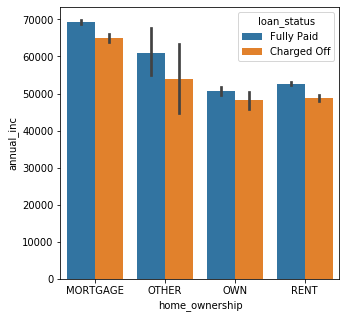

In [116]:
plt.figure(figsize = (5,5))
sns.barplot(y = loan_df['annual_inc'] , x = loan_df['home_ownership'].sort_values(), hue = loan_df['loan_status'])
plt.show()

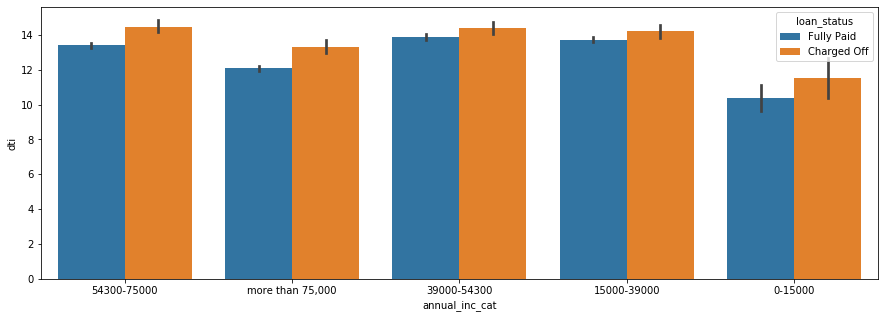

In [117]:
plt.figure(figsize = (15,5))
sns.barplot(x = loan_df['annual_inc_cat'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

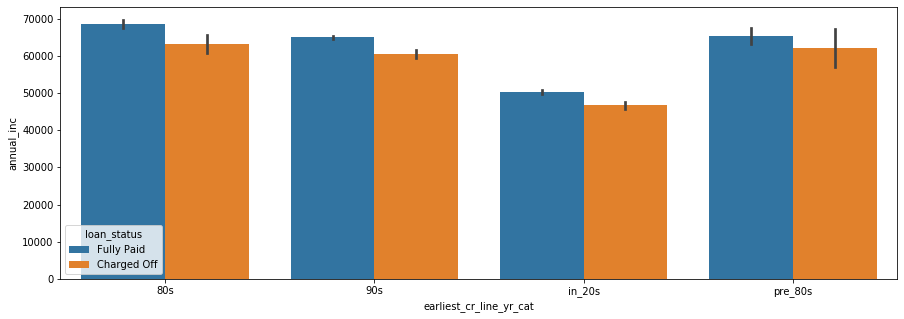

In [118]:
plt.figure(figsize = (15,5))
sns.barplot(y = loan_df['annual_inc'] , x = loan_df['earliest_cr_line_yr_cat'].sort_values(), hue = loan_df['loan_status'])
plt.show()

### dti comparison with ['loan_amnt','term','int_rate','grade','home_ownership','verification_status','earliest_cr_line_yr_cat']

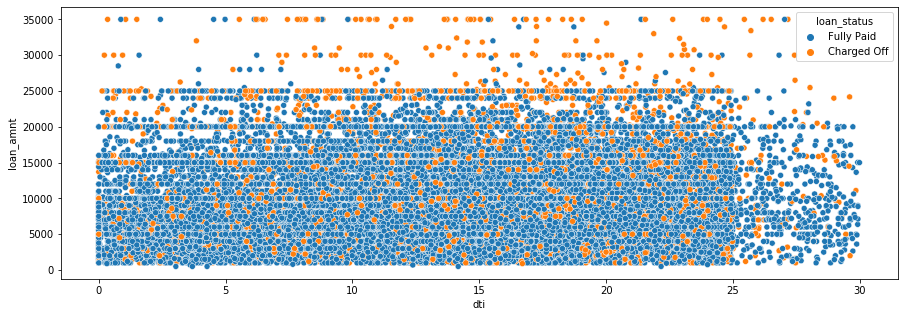

In [119]:
plt.figure(figsize = (15,5))
sns.scatterplot(y = loan_df['loan_amnt'] , x = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

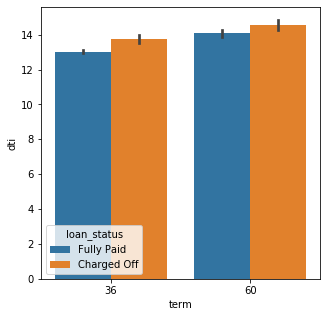

In [120]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['term'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

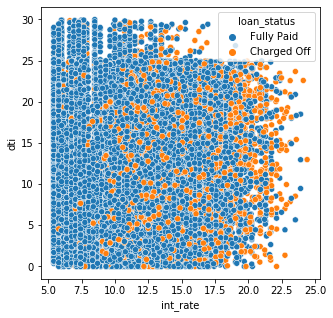

In [121]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = loan_df['int_rate'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

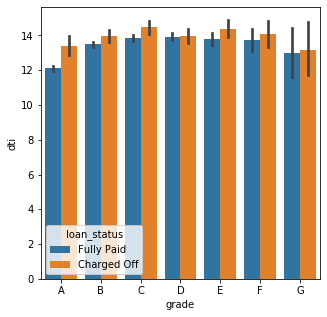

In [122]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['grade'].sort_values() , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

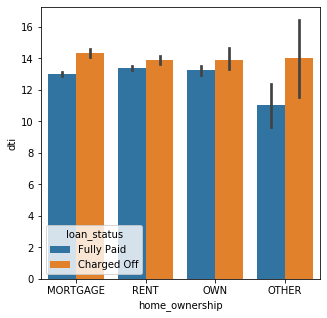

In [123]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['home_ownership'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

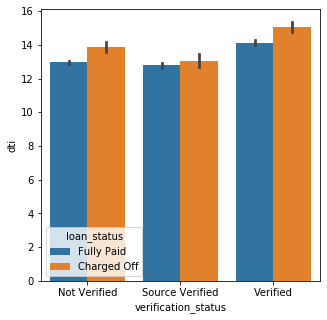

In [124]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['verification_status'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

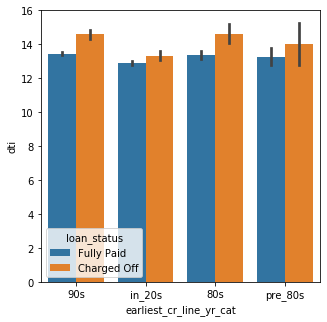

In [125]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['earliest_cr_line_yr_cat'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

### Loan Amount in comparison with 'int_rate', 'grade', 'home_ownership', 'verification_status', 'earliest_cr_line_yr_cat']

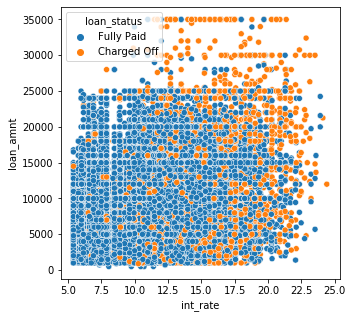

In [126]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = loan_df['int_rate'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

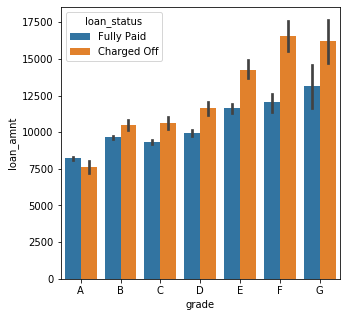

In [127]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['grade'].sort_values() , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

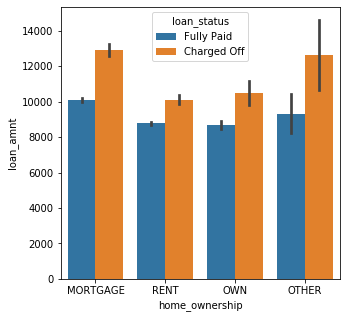

In [128]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['home_ownership'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

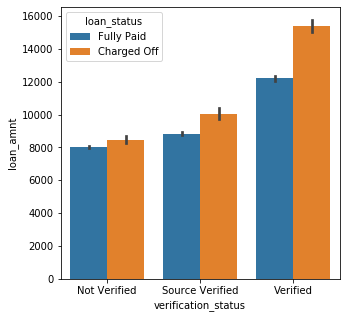

In [129]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['verification_status'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

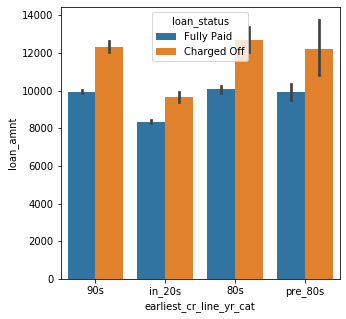

In [130]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['earliest_cr_line_yr_cat'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

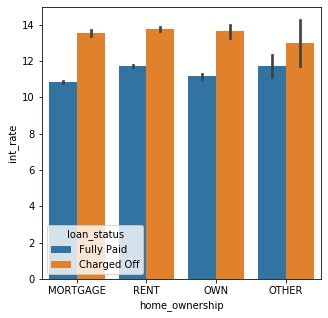

In [131]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['home_ownership'] , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()

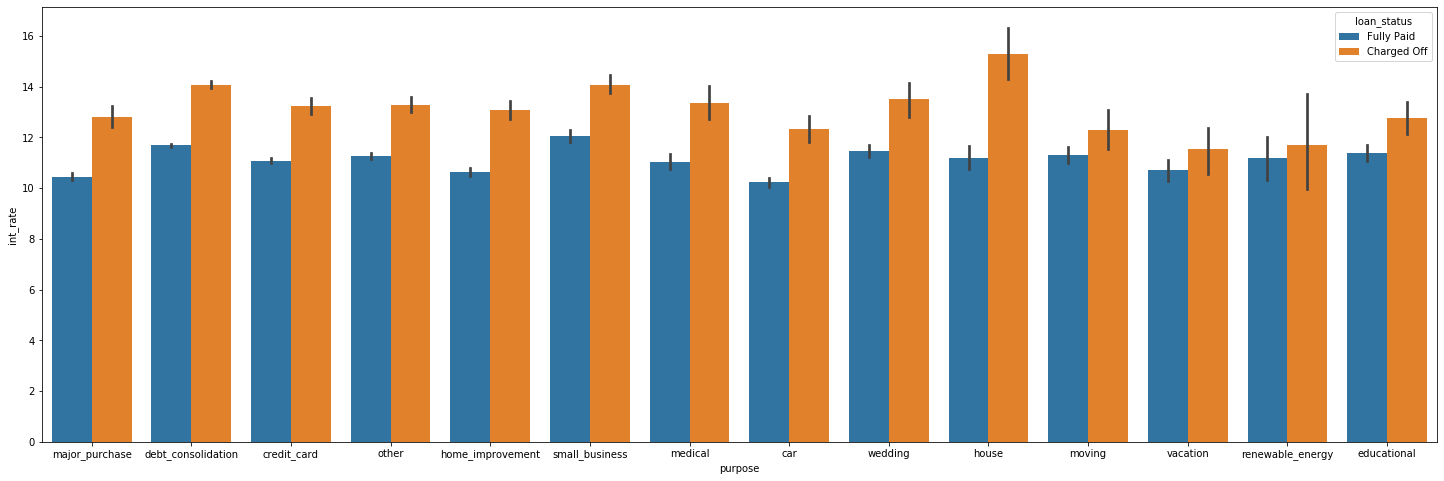

In [132]:
plt.figure(figsize = (25,8))
sns.barplot(x = loan_df['purpose'] , y = loan_df['int_rate'], hue = loan_df['loan_status'] )
plt.show()

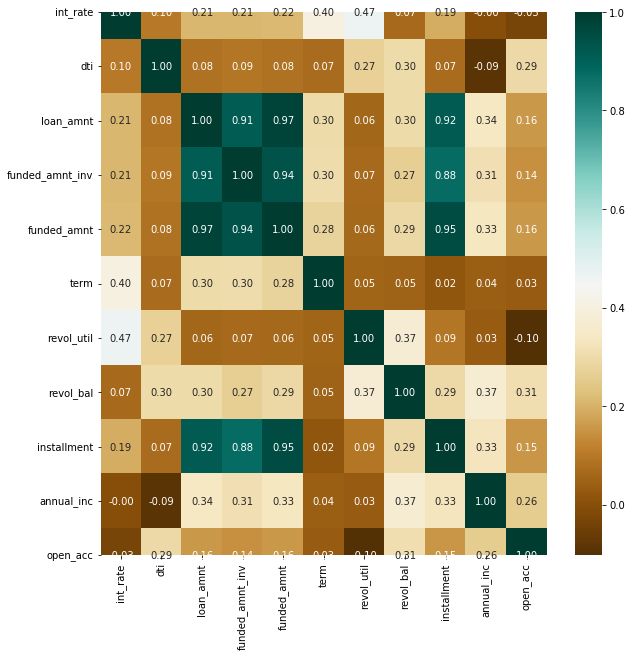

In [133]:
plt.figure(figsize = (10,10))
sns.heatmap(loan_df[['int_rate','dti', 'loan_amnt', 'funded_amnt_inv','funded_amnt', 'term', 'revol_util','revol_bal',
                     'installment','annual_inc', 'open_acc']].corr(), cmap='BrBG',
            annot = True, fmt = '.2f' )
plt.show()

<Figure size 360x360 with 0 Axes>

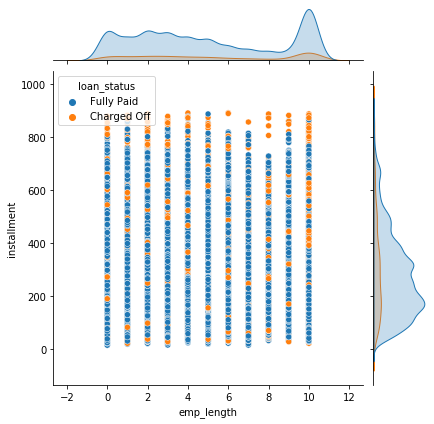

In [134]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['emp_length'] , y = loan_df['installment'], hue = loan_df['loan_status'])
plt.show()

<Figure size 360x360 with 0 Axes>

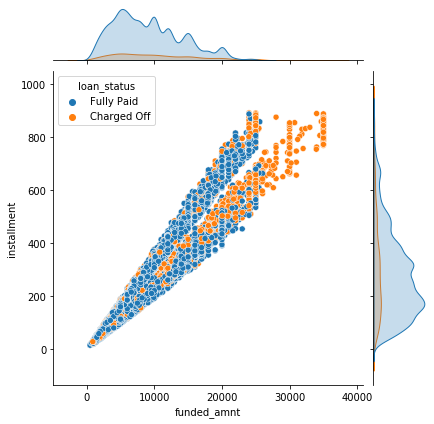

In [135]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['funded_amnt'] , y = loan_df['installment'], hue = loan_df['loan_status'])
plt.show()

<Figure size 360x360 with 0 Axes>

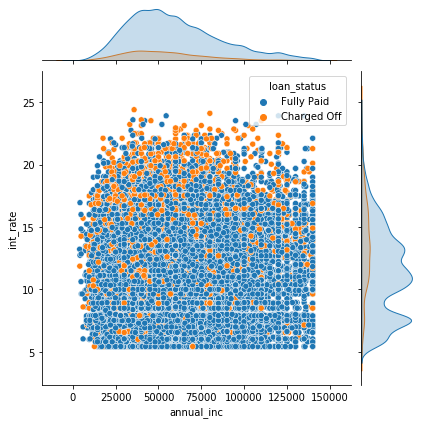

In [136]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['annual_inc'] , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()

<Figure size 360x360 with 0 Axes>

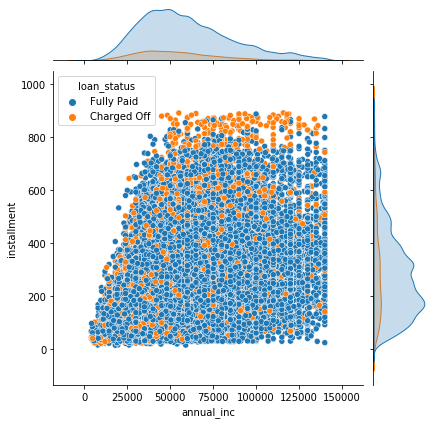

In [137]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['annual_inc'] , y = loan_df['installment'], hue = loan_df['loan_status'])
plt.show()

<Figure size 360x360 with 0 Axes>

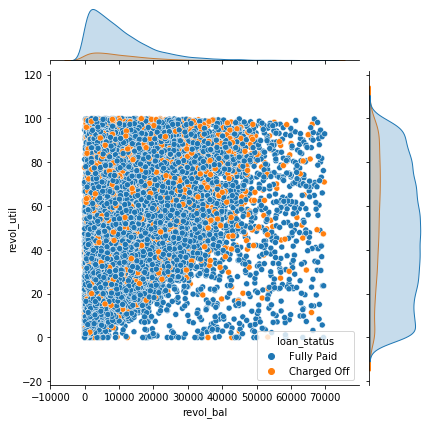

In [138]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['revol_bal'] , y = loan_df['revol_util'], hue = loan_df['loan_status'])
plt.show()

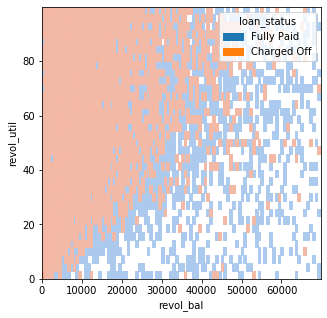

In [139]:
plt.figure(figsize = (5,5))
sns.histplot(x = loan_df['revol_bal'] , y = loan_df['revol_util'], hue = loan_df['loan_status'])
plt.show()

<Figure size 360x360 with 0 Axes>

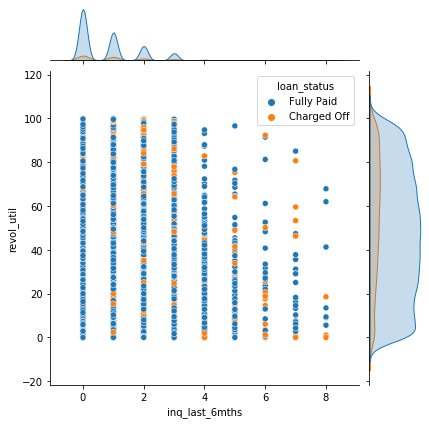

In [140]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['inq_last_6mths'] , y = loan_df['revol_util'], hue = loan_df['loan_status'])
plt.show()

<Figure size 360x360 with 0 Axes>

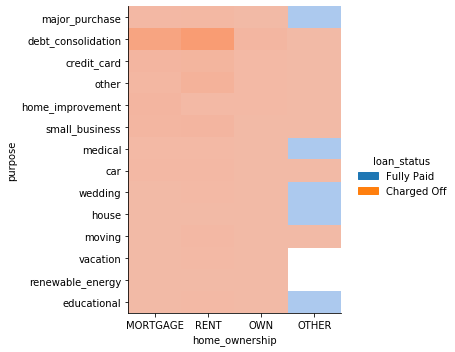

In [141]:
plt.figure(figsize = (5,5))
sns.displot(x = loan_df['home_ownership'] , y = loan_df['purpose'], hue = loan_df['loan_status'])
plt.show()

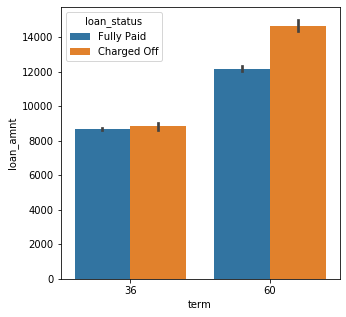

In [142]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['term'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

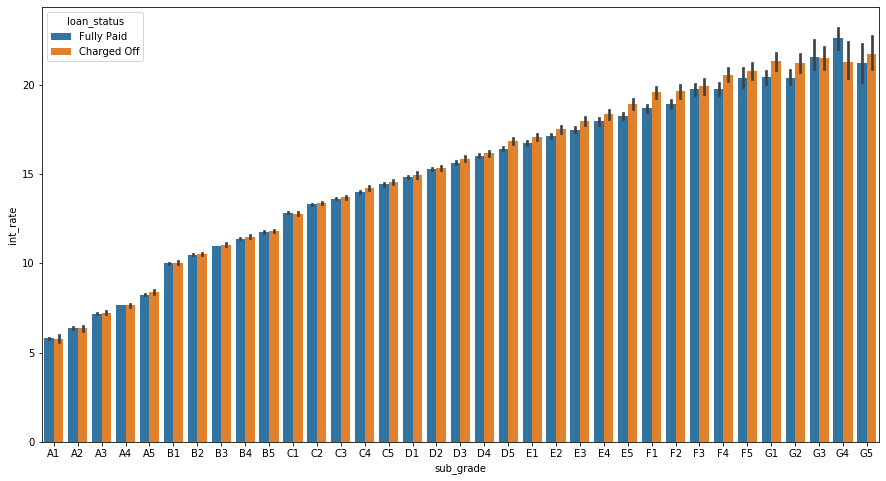

In [143]:
plt.figure(figsize = (15,8))
sns.barplot(x = loan_df['sub_grade'].sort_values() , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()